In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [56]:
import twitter
import yaml

with open('api.yaml') as file:
    documents = yaml.load(file)
    api_info = documents[0]


In [57]:
from twitter import *
t = Twitter(auth=OAuth(api_info['ACCESS_TOKEN'], 
                       api_info['ACCESS_SECRET'], 
                       api_info['CONSUMER_KEY'], 
                       api_info['CONSUMER_SECRET']), retry=True)
results = t.statuses.home_timeline()
for tweet in results:
    print(tweet['text'])

How to start writing data science blogs? by @rpdesai24 https://t.co/mQiRx2gSAW
RT @de3milade: 21 years ago, an NU black student was killed by CPD a few weeks before he graduated. Like many police brutality cases, the r…
The problem is not the very talented, low-flying helicopter pilots wanting to save our city, the problem is the ars… https://t.co/IdUdSCsB0E
...Michael is Tough, Smart, and Loves our Country. This has been a big battle in Congress for 25 years. Thank you t… https://t.co/USITlNUI5e
Congratulations to Michael Pack! Nobody has any idea what a big victory this is for America. Why? Because he is goi… https://t.co/oW70MzV8Bi
The Data Scientists I’ve met by @JosephAllen1234 https://t.co/37MkgHINKq
I wonder how many times in my life I have thought “I’ll always remember this,” that I have now completely forgotten about.
I thought this letter from respected retired Marine and Super Star lawyer, John Dowd, would be of interest to the A… https://t.co/jyUTskleM5
RT @Microsoft: At th

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
from wordcloud import WordCloud

In [59]:
!python ./GetOldTweets3-0.0.10/GetOldTweets3.py --querysearch "#blacklivesmatter" --lang en --maxtweets 1000
!mv output_got.csv twitter_query_data/blm.csv

Saved 1000
Done. Output file generated "output_got.csv".


In [67]:
df = pd.read_csv("blm.csv")
pd.set_option('display.max_colwidth', -1)
df.tail()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
995,2020-06-04 23:11:40,livinoffthewvll,skalirs,0,0,1,People who i hope don’t break the chain @smilexmj @TrecyBenedite @smiIingfaces @Candy_Maah @CHANELD10R @MeshellDeal @kfcformjj @PNKPRlNT @agenttbarton #JusticeForGeorgeFloyd #BlackLivesMatter,NaN,@smilexmj @TrecyBenedite @smiIingfaces @Candy_Maah @CHANELD10R @MeshellDeal @kfcformjj @PNKPRlNT @agenttbarton,#JusticeForGeorgeFloyd #BlackLivesMatter,1268681858247798784,https://twitter.com/livinoffthewvll/status/1268681858247798784
996,2020-06-04 23:11:40,pintocomics,GorillaBrainPod,0,0,0,"I've listened to @8BitRay show before. Always entertaining, certainly funny. He even got me to give that space turd Event Horizon another chance. The reason to listen to this episode is because this one is important and poignant. #blacklivesmatter https:// twitter.com/GorillaBrainPo d/status/1268057160648450049 …",NaN,@8BitRay,#blacklivesmatter,1268681857387974656,https://twitter.com/pintocomics/status/1268681857387974656
997,2020-06-04 23:11:39,zhuquide,NaN,0,0,0,I understand that nobody is perfect. We're not asking you to be perfect. Just don't be racist. #BlackLivesMatter,NaN,NaN,#BlackLivesMatter,1268681854074445827,https://twitter.com/zhuquide/status/1268681854074445827
998,2020-06-04 23:11:39,BurntBadges,NaN,0,0,0,I say this without detracting from the beauty of the protests & what has been achieved thus far. Do not let these counter insurgency tactics keep you from the real change you seek. #BLM #BlackLivesMatter #NoJusticeNoPeace #protest2020 pic.twitter.com/cPlrZidZLR,NaN,NaN,#BLM #BlackLivesMatter #NoJusticeNoPeace #protest2020,1268681852895674370,https://twitter.com/BurntBadges/status/1268681852895674370
999,2020-06-04 23:11:38,ilywintaebear,NaN,0,0,0,"#blacklivesmatter #blm #southampton peaceful protest today in my town , NO JUSTICE NO PEACE ! pic.twitter.com/TblWKPGe0z",NaN,NaN,#blacklivesmatter #blm #southampton,1268681851218153472,https://twitter.com/ilywintaebear/status/1268681851218153472


In [68]:
import nltk
import re
stopwords = nltk.corpus.stopwords.words("english")

# Clean tweets for sentiment analysis
def get_clean_words(words):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Remove URLs
    words = re.sub("(\w+:\/\/\S+)", " ", ' '.join(words)).split()
    
    # Remove subsequences of URL
    words = [w for w in words if w.find("twitter.com") == -1 
             and w.find("instagram.com") == -1 
             and w.find("pictwitter") == -1
             and w.find("youtube.com") == -1
             and w.find("igshid") == -1 
             and w.find("atus") == -1]

    words = [w for w in words if w != "RT" and w != "via"]

    # Remove punctuation
    words = [w.replace('(', '') for w in words]
    words = [w.replace(')', '') for w in words]
    words = [w.replace('?', '') for w in words]
    words = [w.replace(',', '') for w in words]
    words = [w.replace('.', '') for w in words]
    words = [w.replace('"', '') for w in words]
    words = [w.replace('!', '') for w in words]
    words = [w.replace(':', '') for w in words]
    words = [w.replace('&amp;', '') for w in words]
    words = [w.replace('/', '') for w in words]
    words = [w.replace('[', '') for w in words]
    words = [w.replace(']', '') for w in words]
    
    #Remove URL
    
    # Remove numbers
    words = [w for w in words if not _isnum(w)]
    
    # Remove links
    words = [w for w in words if 'http' not in w]
        
    # Remove hashtags
    words = [w for w in words if not w.startswith("#")]
    
    # Remove mentions
    words = [w for w in words if not w.startswith("@")]
    
    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in words if w.lower() not in stopwords]
        
    # Only keep words with more than one character
    words = [w for w in words if len(w) > 1]    
    
    w = " ".join(words)
    return w

In [69]:
# Funtion to pass each tweet into the clean words function and create a new list
def clean_tweets(df):
    new_text = []
    for i in range(len(df)):
        new_text.append(get_clean_words(df['text'].values[i].split()))
    df.text = new_text

In [70]:
clean_tweets(df)

In [71]:
df.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2020-06-04 23:17:42,bluejayjess26,NaN,0,0,0,seriously trending,NaN,NaN,#BLM #Peacefulprotest #GeorgeFloyd #BlackLivesMatter #NoRacism #GeorgeFloydMemorial #protest2020,1268683374488547329,https://twitter.com/bluejayjess26/status/1268683374488547329
1,2020-06-04 23:17:40,TallGamer,NaN,0,0,0,love appreciate delivers messages keeps cool t1pcc,NaN,@KillerMike,#blacklivesmatter,1268683368666988546,https://twitter.com/TallGamer/status/1268683368666988546
2,2020-06-04 23:17:39,Alice_Kelis,NaN,0,0,0,tribute george floyd city,NaN,NaN,#Jorit #Naples #Italy #GeorgeFloyd #MartinLutherKing #Lenin #MalcomX #AngelaDavis #BlackLivesMatteritaly #BlackLivesMatter,1268683363675668485,https://twitter.com/Alice_Kelis/status/1268683363675668485
3,2020-06-04 23:17:39,dallasdoinggood,NaN,0,0,0,team asked black leaders nonprofit social good share best support causes champion ready learn help start dallasdoinggoodcomdoing-goodbla ck-nonprofit-leadership-in-dallas,NaN,NaN,#dallasdoinggood #nonprofit #blackleaders #blacklivesmatter,1268683362224521216,https://twitter.com/dallasdoinggood/status/1268683362224521216
4,2020-06-04 23:17:38,anneeeettee,NaN,0,0,0,people going protests here’s first aid video saw,NaN,NaN,#blm #blacklivesmatter,1268683360420978688,https://twitter.com/anneeeettee/status/1268683360420978688


seriously trending love appreciate delivers messages keeps cool t1pcc tribute george floyd city team asked black leaders nonprofit social good share best support causes champion ready learn help start


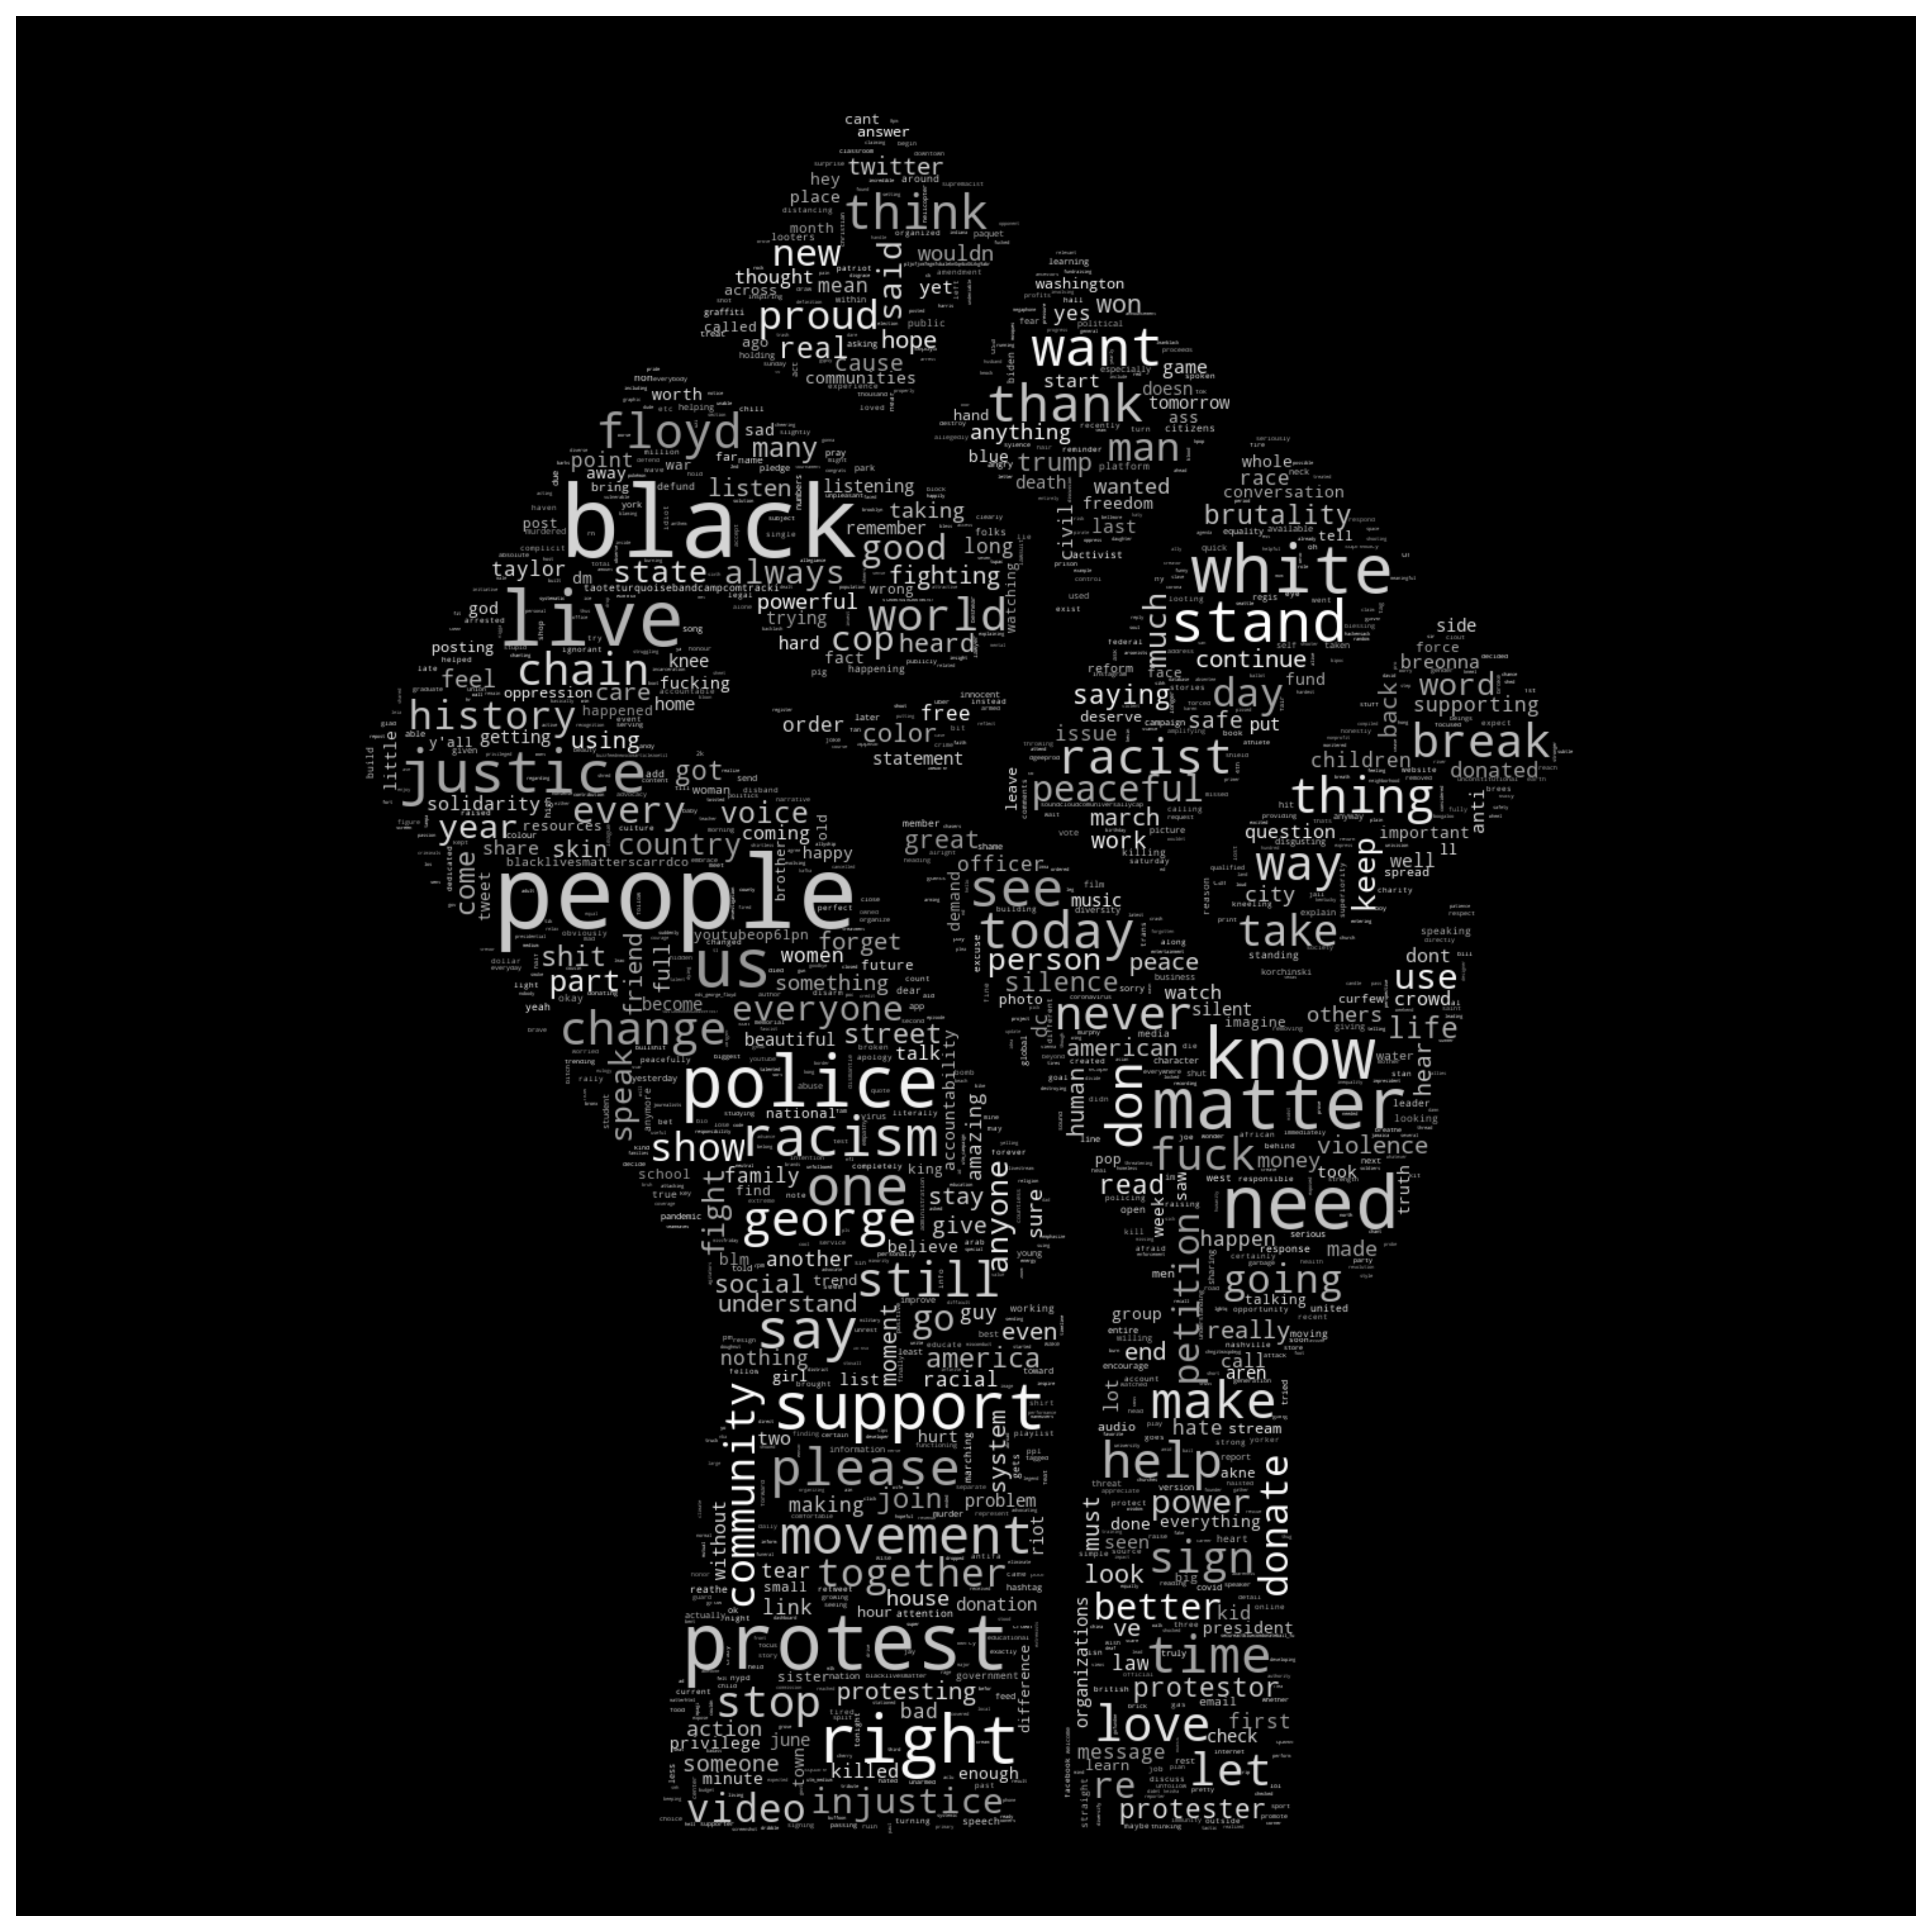

In [72]:

import wordcloud
import matplotlib.pylab as plt
from PIL import Image
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

char_mask = np.array(Image.open("image_masks/blm.jpg"))    
image_colors = wordcloud.ImageColorGenerator(char_mask)
fig = plt.figure(figsize=(12, 18), dpi=300)
text = ' '.join(list(df.text))
print(text[:200])
wc = wordcloud.WordCloud(background_color="black", max_words=10000, width=400, height=400, mask=char_mask, collocations=False, random_state=42)
wc.generate(text)
plt.imshow(wc.recolor(color_func=grey_color_func), interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

## 